# Neural Network to predict video-games sales

---

###### Source: https://www.kaggle.com/kendallgillies/video-game-sales-and-ratings


In [24]:
import pandas as pd
import numpy as np

## Predict - Sales by region

In [25]:
dados = pd.read_csv("games.csv")
dados.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


In [26]:
dados.isnull().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
Publisher            54
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score       8582
Critic_Count       8582
User_Score         6704
User_Count         9129
Developer          6623
Rating             6769
dtype: int64

In [27]:
dados.drop(['Developer', 'Global_Sales', 'Other_Sales'], axis=1, inplace=True)

In [28]:
dados.dropna(axis=0, inplace=True)

In [29]:
dados = dados.loc[dados['NA_Sales'] > 1]
dados = dados.loc[dados['EU_Sales'] > 1]

In [30]:
nome = dados.Name
dados.drop('Name', axis=1, inplace=True)

In [31]:
dados.head()

,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Rating
0,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,76.0,51.0,8,322.0,E
2,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,82.0,73.0,8.3,709.0,E
3,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,80.0,73.0,8,192.0,E
6,DS,2006.0,Platform,Nintendo,11.28,9.14,6.50,89.0,65.0,8.5,431.0,E
7,Wii,2006.0,Misc,Nintendo,13.96,9.18,2.93,58.0,41.0,6.6,129.0,E


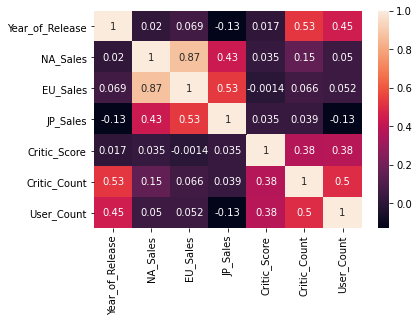

In [74]:
sns.heatmap(dados.corr(), annot=True)

In [32]:
dados.shape

(258, 12)

In [33]:
venda_na = dados.iloc[:,4].values
venda_jp = dados.iloc[:,6].values
venda_eu = dados.iloc[:,5].values

In [34]:
previsores = dados.iloc[:,[0,1,2,3,7,8,9,10,11]].values

In [35]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer 

ct = ColumnTransformer([('columns', OneHotEncoder(), [0,2,3,8])], remainder = 'passthrough')
previsores = ct.fit_transform(previsores).toarray()

In [36]:
previsores.shape

(258, 61)

In [37]:
from keras.layers import Dense, Input, Activation, Dropout
from keras.models import Model

In [38]:
print((previsores.shape[1] + 3)/2)

32.0


In [39]:
camada_entrada = Input(shape=(61,))
camada_oculta1 = Dense(units=19, activation='sigmoid')(camada_entrada)
camada_oculta2 = Dense(units=19, activation='sigmoid')(camada_oculta1)
camada_saida1 = Dense(units=1, activation='linear')(camada_oculta2)
camada_saida2 = Dense(units=1, activation='linear')(camada_oculta2)
camada_saida3 = Dense(units=1, activation='linear')(camada_oculta2)

regressor = Model(inputs=camada_entrada,
                  outputs=[camada_saida1, camada_saida2, camada_saida3])
regressor.compile(optimizer='adam', loss='mse')
regressor.fit(previsores, [venda_eu, venda_jp, venda_na], batch_size=100, epochs=500)

Epoch 1/500
3/3 [==============================] - 1s 4ms/step - loss: 27.4131 - dense_7_loss: 9.1249 - dense_8_loss: 1.6553 - dense_9_loss: 16.6329
Epoch 2/500
3/3 [==============================] - 0s 5ms/step - loss: 25.5948 - dense_7_loss: 8.5837 - dense_8_loss: 1.4996 - dense_9_loss: 15.5115
Epoch 3/500
3/3 [==============================] - 0s 3ms/step - loss: 33.7836 - dense_7_loss: 11.0232 - dense_8_loss: 1.3860 - dense_9_loss: 21.3744
Epoch 4/500
3/3 [==============================] - 0s 4ms/step - loss: 26.5037 - dense_7_loss: 8.7987 - dense_8_loss: 1.4820 - dense_9_loss: 16.2231
Epoch 5/500
3/3 [==============================] - 0s 4ms/step - loss: 27.3972 - dense_7_loss: 9.2169 - dense_8_loss: 1.3178 - dense_9_loss: 16.8625
Epoch 6/500
3/3 [==============================] - 0s 3ms/step - loss: 31.4897 - dense_7_loss: 10.3582 - dense_8_loss: 1.2891 - dense_9_loss: 19.8423
Epoch 7/500
3/3 [==============================] - 0s 6ms/step - loss: 27.7928 - dense_7_loss: 9.1850 - 

In [40]:
previsao_eu, previsao_jp, previsao_na = regressor.predict(previsores)

In [46]:
print("Prediction EU:", previsao_eu.mean(), "Real Values:", venda_eu.mean())
##
print("Prediction JP:", previsao_jp.mean(), "Real Values JP:", venda_jp.mean())
##
print("Prediction NA:", previsao_na.mean(), "Real Values NA:", venda_na.mean())

Prediction EU: 2.3515937 Real Values: 2.35046511627907
Prediction JP: 0.5927645 Real Values JP: 0.5862015503875969
Prediction NA: 3.2871842 Real Values NA: 3.283837209302326


## Results:
Prediction EU: 2.3515937; Real Values: 2.35046511627907
\
Prediction JP: 0.5927645; Real Values JP: 0.5862015503875969
\
Prediction NA: 3.2871842; Real Values NA: 3.283837209302326

## Predict - Global Sales

In [123]:
dados = pd.read_csv("games.csv")
dados.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


In [124]:
dados.drop(['Name', 'Developer', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'], axis=1, inplace=True)

dados = dados[dados["Global_Sales"] > 1]
dados.dropna(axis=0, inplace=True)

In [125]:
dados.head()

,Platform,Year_of_Release,Genre,Publisher,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Rating
0,Wii,2006.0,Sports,Nintendo,82.53,76.0,51.0,8,322.0,E
2,Wii,2008.0,Racing,Nintendo,35.52,82.0,73.0,8.3,709.0,E
3,Wii,2009.0,Sports,Nintendo,32.77,80.0,73.0,8,192.0,E
6,DS,2006.0,Platform,Nintendo,29.80,89.0,65.0,8.5,431.0,E
7,Wii,2006.0,Misc,Nintendo,28.92,58.0,41.0,6.6,129.0,E


In [127]:
previsores = dados.iloc[:,[0,1,2,3,5,6,7,8,9]].values

In [128]:
ct = ColumnTransformer([('columns', OneHotEncoder(), [0,2,3,8])], remainder = 'passthrough')
previsores = ct.fit_transform(previsores).toarray()

In [130]:
global_sales = dados.iloc[:,4].values

In [137]:
previsores.shape

(1307, 99)

In [139]:
camada_entrada = Input(shape=(99,))
camada_oculta1 = Dense(units=19, activation='sigmoid')(camada_entrada)
camada_oculta2 = Dense(units=19, activation='sigmoid')(camada_oculta1)
camada_saida = Dense(units=1, activation='linear')(camada_oculta2)

regressor = Model(inputs=camada_entrada,
                  outputs=camada_saida)
regressor.compile(optimizer='adam', loss='mse')
regressor.fit(previsores, global_sales, batch_size=100, epochs=500)

Epoch 1/500
14/14 [==============================] - 0s 2ms/step - loss: 17.9584 - accuracy: 0.0000e+00
Epoch 2/500
14/14 [==============================] - 0s 2ms/step - loss: 15.8234 - accuracy: 0.0000e+00
Epoch 3/500
14/14 [==============================] - 0s 2ms/step - loss: 11.7871 - accuracy: 0.0000e+00
Epoch 4/500
14/14 [==============================] - 0s 2ms/step - loss: 14.1508 - accuracy: 0.0000e+00
Epoch 5/500
14/14 [==============================] - 0s 2ms/step - loss: 12.9652 - accuracy: 0.0000e+00
Epoch 6/500
14/14 [==============================] - 0s 2ms/step - loss: 15.6085 - accuracy: 0.0000e+00
Epoch 7/500
14/14 [==============================] - 0s 2ms/step - loss: 14.3334 - accuracy: 0.0000e+00
Epoch 8/500
14/14 [==============================] - 0s 2ms/step - loss: 14.3739 - accuracy: 0.0000e+00
Epoch 9/500
14/14 [==============================] - 0s 2ms/step - loss: 11.3924 - accuracy: 0.0000e+00
Epoch 10/500
14/14 [==============================] - 0s 2ms/ste

In [140]:
previsao_global = regressor.predict(previsores)

In [142]:
print("Prediction :", previsao_global.mean(), "Real value :", global_sales.mean())

Prediction : 2.9331524 Real value : 2.837390971690895


## Results:
Prediction : 2.9331524; Real value : 2.837390971690895